![title](movie1.png)

# 📚 Importing Libraries 📚

In [204]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [152]:
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
data.shape

(15509, 10)

In [31]:
data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1'],
      dtype='object')

Name: Name of the movie

Year: Release year of the movie

Duration: Time duration of the movie

Genre: Genre of the movie

Rating: Rating of the movie

Votes: Total votes given to the movie

Director: Director of the movie

Actor1/Actor2/Actor3: Lead actors of the movie

In [10]:
data.describe(include='all')

Name    Year Duration  Genre       Rating Votes      Director  \
count    15509   14981     7240  13632  7919.000000  7920         14984   
unique   13838     102      182    485          NaN  2034          5938   
top     Anjaam  (2019)  120 min  Drama          NaN     8  Jayant Desai   
freq         7     410      240   2780          NaN   227            58   
mean       NaN     NaN      NaN    NaN     5.841621   NaN           NaN   
std        NaN     NaN      NaN    NaN     1.381777   NaN           NaN   
min        NaN     NaN      NaN    NaN     1.100000   NaN           NaN   
25%        NaN     NaN      NaN    NaN     4.900000   NaN           NaN   
50%        NaN     NaN      NaN    NaN     6.000000   NaN           NaN   
75%        NaN     NaN      NaN    NaN     6.800000   NaN           NaN   
max        NaN     NaN      NaN    NaN    10.000000   NaN           NaN   

            Actor 1 Actor 2 Actor 3  
count         13892   13125   12365  
unique         4718    4891    4820  
top     Ashok Kumar   Rekha    Pran  
freq            158      83      91  
mean            NaN     NaN     NaN  
std             NaN     NaN     NaN  
min             NaN     NaN     NaN  
25%             NaN     NaN     NaN  
50%             NaN     NaN     NaN  
75%             NaN     NaN     NaN  
max             NaN     NaN     NaN

In [11]:
data.Year.unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [12]:
data.Rating.unique() 

array([ nan,  7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,
        6.3,  7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  5. ,  4.5,  6.4,  4.1,
        4.8,  8.1,  5.5,  6.8,  6.1,  7.7,  5.1,  7.6,  3.1,  3.3,  7.8,
        8.4,  5.2,  4.3,  5.8,  4.6,  7.5,  6.7,  3.6,  3.9,  5.4,  4.2,
        5.3,  3.4,  3. ,  8. ,  6. ,  3.8,  7.9,  2.7,  4.9,  2.4,  3.7,
        3.2,  2.5,  2.8,  2.6,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,
        2.3,  8.5,  8.6,  9. ,  9.6,  1.7,  9.1,  2. ,  1.4,  8.9,  1.9,
        9.4,  9.7,  1.8,  9.2,  1.6, 10. ,  2.2,  1.1])

In [13]:
data['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

## 🧹 Data Cleaning 🧹

In [153]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [154]:
# Locating rows with missing values in columns from 1 to 9
nulls = data[data.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

Name Year Duration Genre  Rating Votes Director Actor 1  \
1836  Bang Bang Reloaded  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
1920   Battle of bittora  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
2653              Campus  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
3403         Dancing Dad  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
3807            Dial 100  NaN      NaN   NaN     NaN   NaN      NaN     NaN   

     Actor 2 Actor 3  
1836     NaN     NaN  
1920     NaN     NaN  
2653     NaN     NaN  
3403     NaN     NaN  
3807     NaN     NaN

In [155]:
#Checking if there are any typos
for col in data.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(data[col].unique())
    print('\n', '-'*60, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 ------------------------------------------------------------ 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)'

In [156]:
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_movie = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_movie['Percentage'] = result_movie['Percentage'].astype(str) + '%'

    return result_movie


result = missing_values_percent(data)
result

Missing Values Percentage
Name                   0       0.0%
Year                 528       3.4%
Duration            8269     53.32%
Genre               1877      12.1%
Rating              7590     48.94%
Votes               7589     48.93%
Director             525      3.39%
Actor 1             1617     10.43%
Actor 2             2384     15.37%
Actor 3             3144     20.27%

In [157]:
data.drop(['Actor 2' , 'Actor 3'], axis=1, inplace=True)

In [158]:
data.dropna(subset=['Duration'], inplace = True)

In [159]:
data = data[data.isnull().sum(axis=1).sort_values(ascending=False) <=5]

In [160]:
missing_values_percent(data)

Missing Values Percentage
Name                   0       0.0%
Year                 125      1.73%
Duration               0       0.0%
Genre                187      2.58%
Rating              1389     19.19%
Votes               1389     19.19%
Director              14      0.19%
Actor 1              264      3.65%

In [161]:
data.dropna(subset=['Rating', 'Votes'], inplace=True)
director_description = data['Director'].describe()

director_counts = data['Director'].value_counts().sort_values(ascending=False)
data['Director'].fillna('rajmouli', inplace=True)

genre_counts = data['Genre'].value_counts().sort_values(ascending=False)
data['Genre'].fillna('Action', inplace=True)

actor1_description = data['Actor 1'].describe()
data['Actor 1'].fillna('mahesh babu', inplace=True)

missing_values_df = pd.DataFrame({
    'Missing Values': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data) * 100).round(2)
})

data.head()

Name    Year Duration  \
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                             #Yaaram  (2019)  110 min   
5                ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                           ...Yahaan  (2005)  142 min   
8                  ?: A Question Mark  (2012)   82 min   

                       Genre  Rating  Votes        Director          Actor 1  
1                      Drama     7.0      8   Gaurav Bakshi     Rasika Dugal  
3            Comedy, Romance     4.4     35      Ovais Khan          Prateik  
5     Comedy, Drama, Musical     4.7    827    Rahul Rawail       Bobby Deol  
6        Drama, Romance, War     7.4  1,086  Shoojit Sircar  Jimmy Sheirgill  
8  Horror, Mystery, Thriller     5.6    326   Allyson Patel        Yash Dave

In [162]:
missing_values_percent(data)

Missing Values Percentage
Name                   0       0.0%
Year                   0       0.0%
Duration               0       0.0%
Genre                  0       0.0%
Rating                 0       0.0%
Votes                  0       0.0%
Director               0       0.0%
Actor 1                0       0.0%

In [163]:
data.shape

(5851, 8)

In [164]:
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True)
data['Duration'] = data['Duration'].str.replace(r' min', '', regex=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), object(7)
memory usage: 411.4+ KB


In [165]:
int_columns = ['Year', 'Duration']
data[int_columns] = data[int_columns].astype(int)
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 342.8+ KB


In [166]:
data.duplicated().sum()

0

In [167]:
data

Name  Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019       109   
3                                 #Yaaram  2019       110   
5                    ...Aur Pyaar Ho Gaya  1997       147   
6                               ...Yahaan  2005       142   
8                      ?: A Question Mark  2012        82   
...                                   ...   ...       ...   
15493                              Zubaan  2015       115   
15494                            Zubeidaa  2001       153   
15503                     Zulm Ki Zanjeer  1989       125   
15505                               Zulmi  1999       129   
15508                        Zulm-O-Sitam  1998       130   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy, Drama, Musical     4.7    827     Rahul Rawail   
6            Drama, Romance, War     7.4   1086   Shoojit Sircar   
8      Horror, Mystery, Thriller     5.6    326    Allyson Patel   
...                          ...     ...    ...              ...   
15493                      Drama     6.1    408      Mozez Singh   
15494  Biography, Drama, History     6.2   1496    Shyam Benegal   
15503       Action, Crime, Drama     5.8     44  S.P. Muthuraman   
15505              Action, Drama     4.5    655       Kuku Kohli   
15508              Action, Drama     6.2     20     K.C. Bokadia   

               Actor 1  
1         Rasika Dugal  
3              Prateik  
5           Bobby Deol  
6      Jimmy Sheirgill  
8            Yash Dave  
...                ...  
15493    Vicky Kaushal  
15494   Karisma Kapoor  
15503      Chiranjeevi  
15505     Akshay Kumar  
15508       Dharmendra  

[5851 rows x 8 columns]

### Removing unwanted symbols 

In [184]:
# Remove ',' from  votes column
data['Votes'] = data['Votes'].astype(str)
data['Votes'] = data['Votes'].str.replace(',', '')
#Extracting only the text part from the Name column
data['Name'] = data['Name'].str.extract('([A-Za-z\s\'\-]+)')
# Replacing the brackets from year column
data['Year'] = data['Year'].astype(str)
data['Year'] = data['Year'].str.replace(r'[()]', '', regex=True)
# Replacing the 'min'
data['Duration'] = data['Duration'].astype(str)
data['Duration'] = data['Duration'].str.replace(r' min', '', regex=True)

In [185]:
data

Name  Year Duration                      Genre  Rating  \
1                Gadhvi   2019      109                      Drama     7.0   
3                 Yaaram  2019      110            Comedy, Romance     4.4   
5      Aur Pyaar Ho Gaya  1997      147     Comedy, Drama, Musical     4.7   
6                 Yahaan  2005      142        Drama, Romance, War     7.4   
8        A Question Mark  2012       82  Horror, Mystery, Thriller     5.6   
...                  ...   ...      ...                        ...     ...   
15493             Zubaan  2015      115                      Drama     6.1   
15494           Zubeidaa  2001      153  Biography, Drama, History     6.2   
15503    Zulm Ki Zanjeer  1989      125       Action, Crime, Drama     5.8   
15505              Zulmi  1999      129              Action, Drama     4.5   
15508       Zulm-O-Sitam  1998      130              Action, Drama     6.2   

      Votes         Director          Actor 1  
1         8    Gaurav Bakshi     Rasika Dugal  
3        35       Ovais Khan          Prateik  
5       827     Rahul Rawail       Bobby Deol  
6      1086   Shoojit Sircar  Jimmy Sheirgill  
8       326    Allyson Patel        Yash Dave  
...     ...              ...              ...  
15493   408      Mozez Singh    Vicky Kaushal  
15494  1496    Shyam Benegal   Karisma Kapoor  
15503    44  S.P. Muthuraman      Chiranjeevi  
15505   655       Kuku Kohli     Akshay Kumar  
15508    20     K.C. Bokadia       Dharmendra  

[5851 rows x 8 columns]

### Change the type of this columns : 

In [42]:
data['Year'] = data['Year'].astype('int32')
data['Duration'] = data['Duration'].astype('int32')
data['Votes'] = data['Votes'].astype('int32')

# 📊 Data Visualization 📊

##  Univariate Analysis

### ** Year ** 

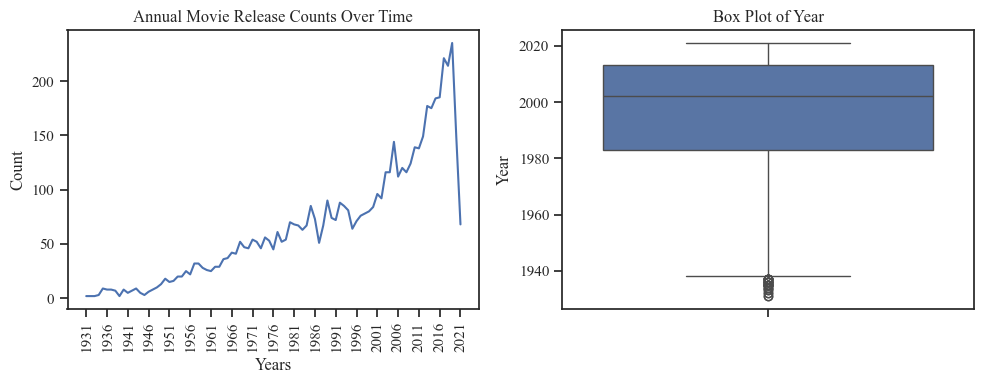

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb

# Assume df is your DataFrame

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# First subplot - Line Plot
sb.set(style="ticks", font="Times New Roman")
lineplot_ax = sb.lineplot(data=data['Year'].value_counts().sort_index(), ax=ax1)
tick_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
lineplot_ax.set_title("Annual Movie Release Counts Over Time")
lineplot_ax.set_xticks(tick_positions)
lineplot_ax.set_xticklabels(tick_positions, rotation=90)
lineplot_ax.set_xlabel("Years")
lineplot_ax.set_ylabel("Count")
boxplot_ax = sb.boxplot(data=data, y='Year', ax=ax2)
boxplot_ax.set_ylabel('Year')
boxplot_ax.set_title('Box Plot of Year')
plt.tight_layout()
plt.show()


### ** Duration **

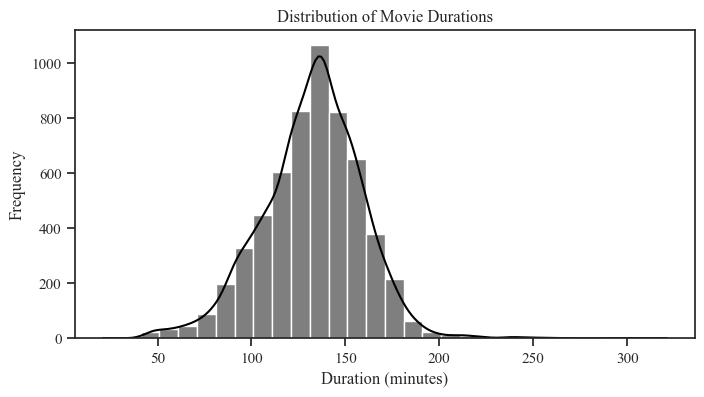

In [79]:
plt.figure(figsize=(8, 4))
sns.histplot(data=data, x='Duration', kde=True, color='black', bins=30)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

### ** Genre **

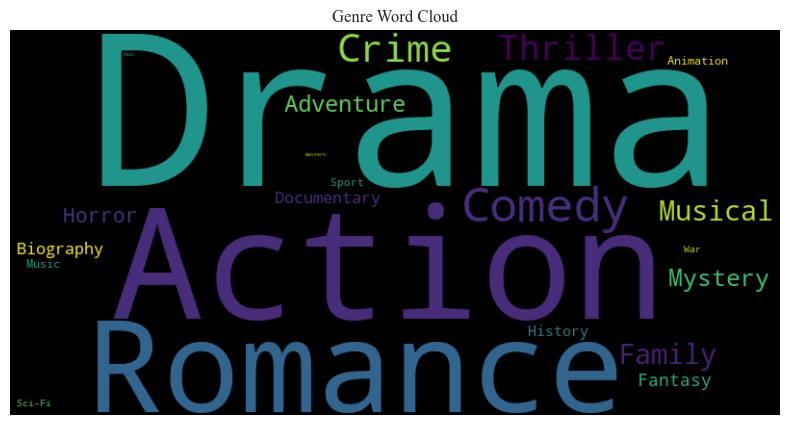

In [78]:
from wordcloud import WordCloud
genre_counts = data['Genre'].str.split(', ', expand=True).stack().value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

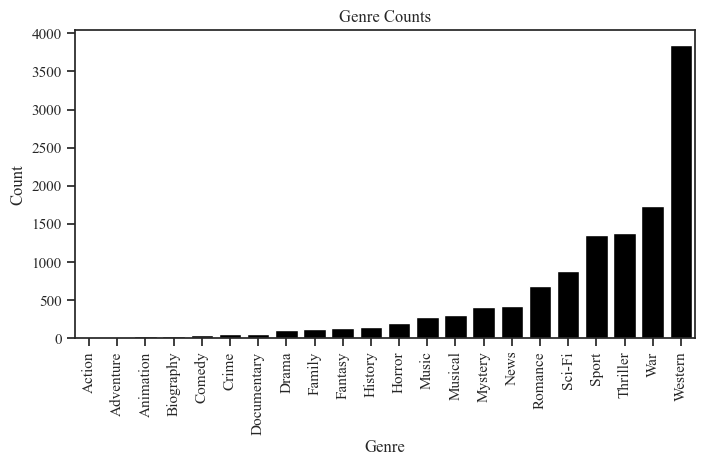

In [70]:
# Use np.sort to sort the values
genre_labels = sorted(genre_counts.keys())
genre_counts_sorted = np.sort(genre_counts.values)
plt.figure(figsize=(8, 4))
ax = sb.barplot(x=genre_labels, y=genre_counts_sorted, color='black')
ax.set_xticklabels(labels=genre_labels, rotation=90)
ax.set_title('Genre Counts')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')
mpl.show()

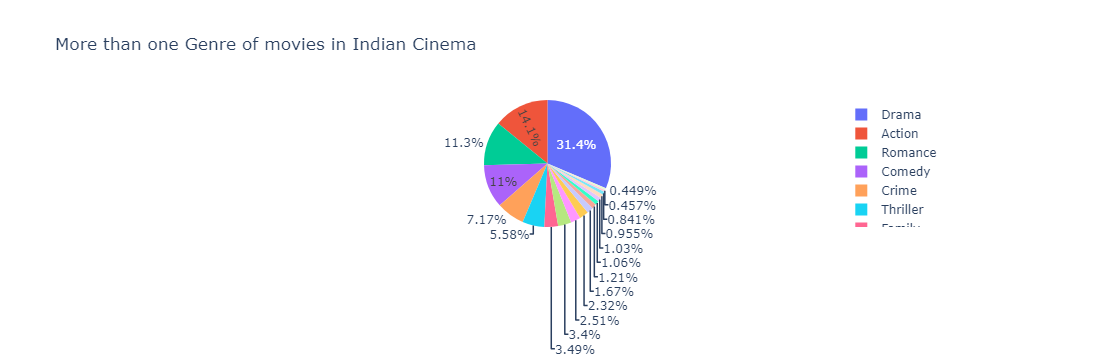

In [69]:
genrePie = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})
genrePie.loc[genrePie['Count'] < 50, 'Genre'] = 'Other'
ax = px.pie(genrePie, values='Count', names='Genre', title='More than one Genre of movies in Indian Cinema')
ax.show()

### ** Rating ** 

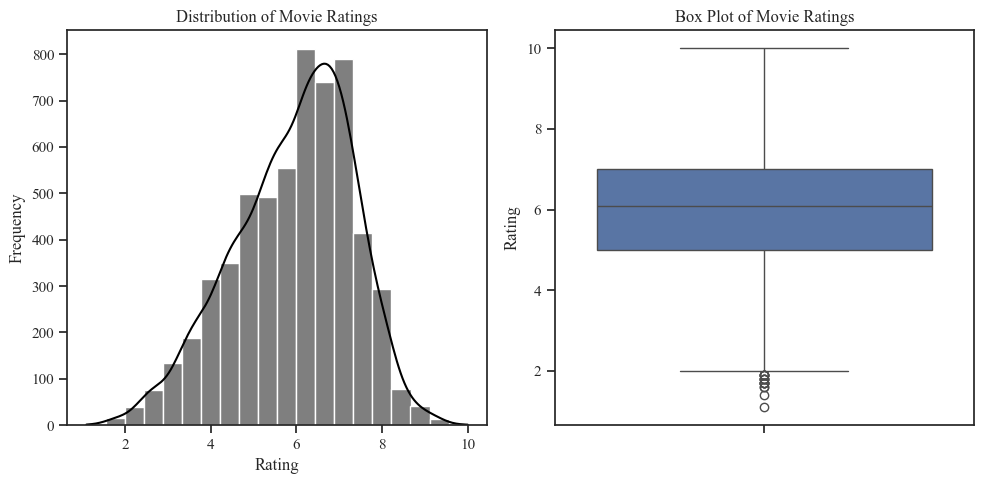

In [74]:
import seaborn as sb
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax1 = sb.histplot(data=data, x="Rating", bins=20, kde=True, color='black', ax=axes[0])
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Movie Ratings')
ax2 = sb.boxplot(data=data, y='Rating', ax=axes[1])
ax2.set_ylabel('Rating')
ax2.set_title('Box Plot of Movie Ratings')
plt.tight_layout()
plt.show()

### ** Director **

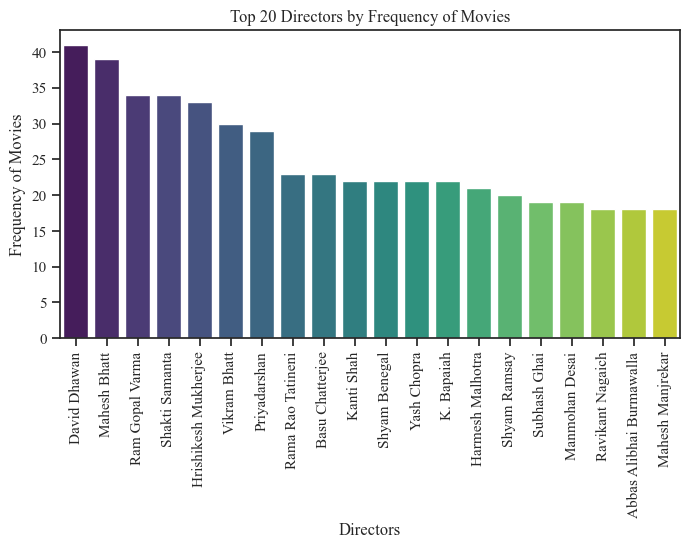

In [80]:
import matplotlib.pyplot as mpl
import seaborn as sb

directors = data['Director'].value_counts()

mpl.figure(figsize=(8, 4))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()


### ** Actor **

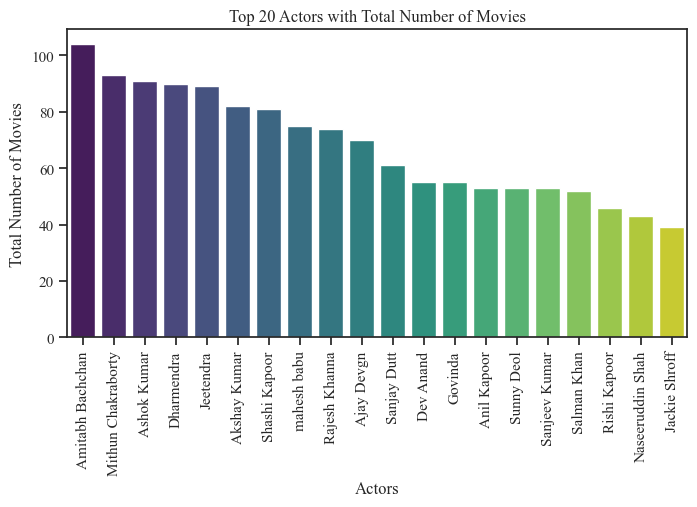

In [82]:
import matplotlib.pyplot as mpl
import seaborn as sb

actors = data['Actor 1'].value_counts()

mpl.figure(figsize=(8, 4))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()


### ** Vote **

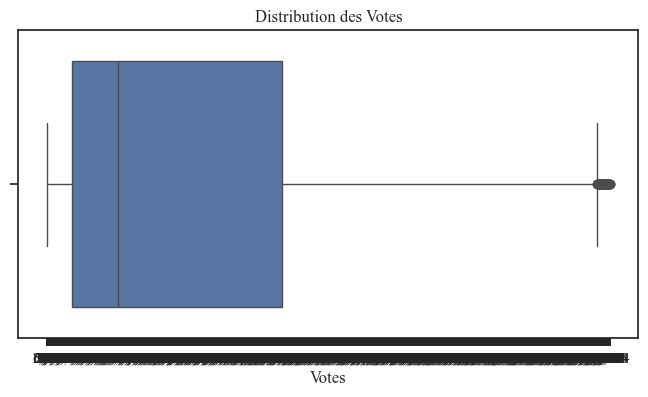

In [135]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['Votes'])
plt.title('Distribution des Votes')
plt.xlabel('Votes')
plt.show()

## Bivariate 

### ** Duration by Year ** 

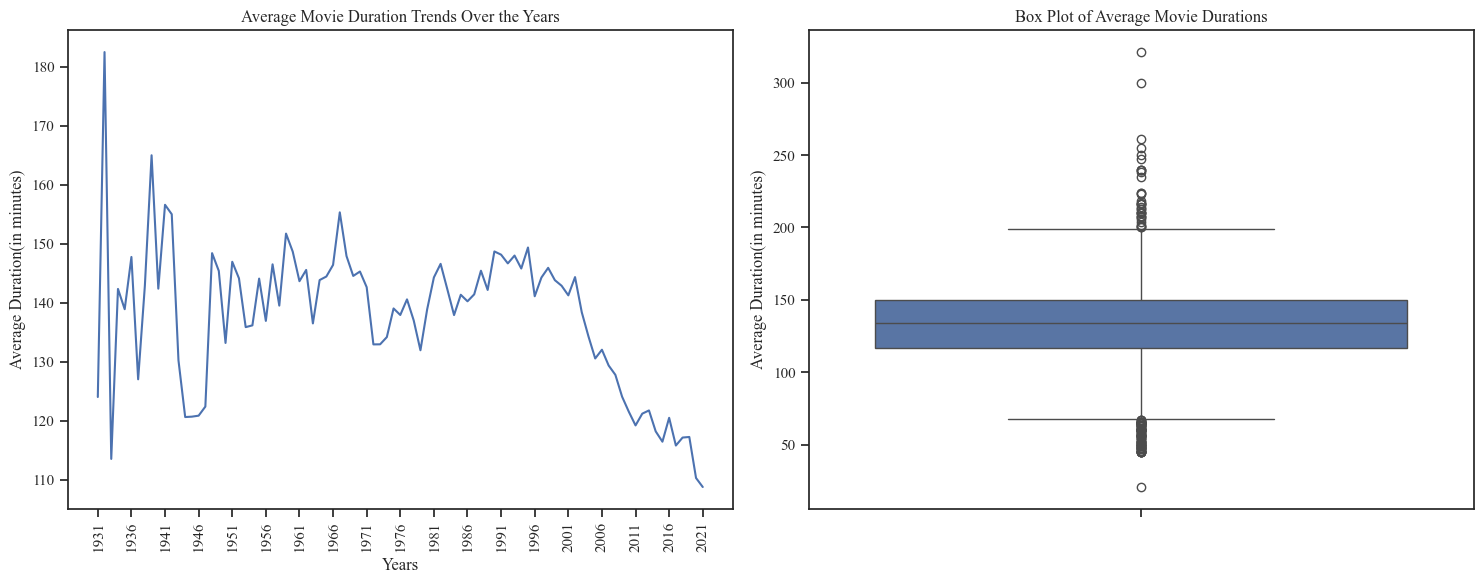

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
lineplot_ax = sb.lineplot(data=data.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration', ax=ax1)
tick_positions = range(min(data['Year']), max(data['Year']) + 1, 5)
lineplot_ax.set_title("Average Movie Duration Trends Over the Years")
lineplot_ax.set_xticks(tick_positions)
lineplot_ax.set_xticklabels(tick_positions, rotation=90)
lineplot_ax.set_xlabel("Years")
lineplot_ax.set_ylabel('Average Duration(in minutes)')
boxplot_ax = sb.boxplot(data=data, y='Duration', ax=ax2)
boxplot_ax.set_title("Box Plot of Average Movie Durations")
boxplot_ax.set_ylabel('Average Duration(in minutes)')
plt.tight_layout()
plt.show()

## ** Rating by Total Votes **

In [84]:
Q1 = data['Rating'].quantile(0.25)
Q3 = data['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['Rating'] >= lower_bound) & (data['Rating'] <= upper_bound)]
data.head(5)

Name  Year  Duration                      Genre  Rating  \
1            Gadhvi   2019       109                      Drama     7.0   
3             Yaaram  2019       110            Comedy, Romance     4.4   
5  Aur Pyaar Ho Gaya  1997       147     Comedy, Drama, Musical     4.7   
6             Yahaan  2005       142        Drama, Romance, War     7.4   
8    A Question Mark  2012        82  Horror, Mystery, Thriller     5.6   

   Votes        Director          Actor 1  
1      8   Gaurav Bakshi     Rasika Dugal  
3     35      Ovais Khan          Prateik  
5    827    Rahul Rawail       Bobby Deol  
6   1086  Shoojit Sircar  Jimmy Sheirgill  
8    326   Allyson Patel        Yash Dave

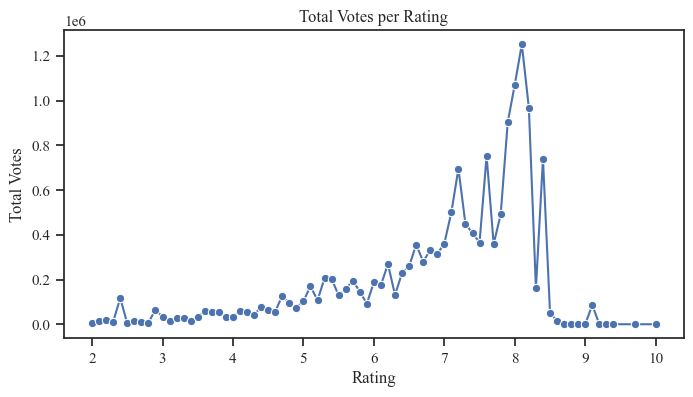

In [86]:
rating_votes = data.groupby('Rating')['Votes'].sum().reset_index()
mpl.figure(figsize=(8, 4))
ax_line_seaborn = sb.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
mpl.show()

## ** Genre by Year ** 

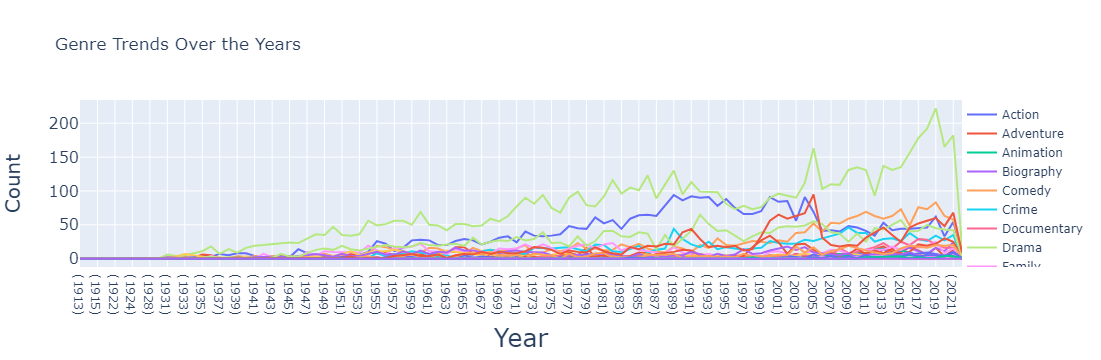

In [102]:
dummies = data['Genre'].str.get_dummies(', ')
df_genre = pd.concat([data, dummies], axis=1)
# Plot genre trends over the years
genre_columns = df_genre.columns[10:]  # Assuming genre columns start from the 11th column
genre_count_by_year = df_genre.groupby('Year')[genre_columns].sum().reset_index()

fig = go.Figure()
for genre in genre_columns:
    fig.add_trace(go.Scatter(x=genre_count_by_year['Year'], y=genre_count_by_year[genre],
                             mode='lines', name=genre))

fig.update_layout(
    title='Genre Trends Over the Years',
    xaxis=dict(title='Year', titlefont_size=25),
    yaxis=dict(title='Count', titlefont_size=20, tickfont_size=16),
    legend=dict(y=0, x=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)')
)
fig.show()

## ** Top Director by Year **

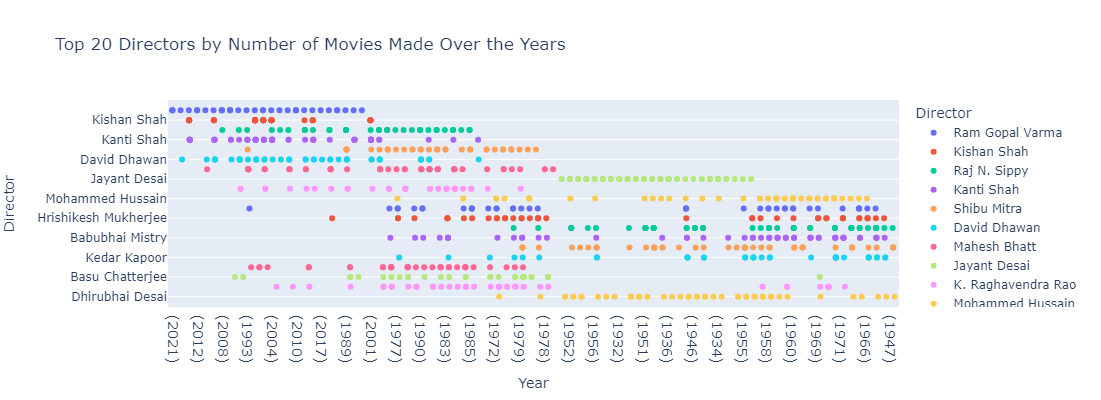

In [98]:
# Top Directors Analysis
director_df = data[['Director', 'Year']].dropna()
director_df['Movie_Count'] = 1
# Get the top 20 directors by movie count
top_20_directors = director_df['Director'].value_counts().head(20).index.tolist()
top_20_director_df = director_df[director_df['Director'].isin(top_20_directors)]
# Plot the top 20 directors by movie count over the years
fig = px.strip(top_20_director_df, x='Year', y='Director', color='Director', title='Top 20 Directors by Number of Movies Made Over the Years')
fig.update_layout(
    xaxis_tickfont_size=14,
    height=400
)
fig.show()

## Multivariate

### ** Duration, Rating, and Votes ** 

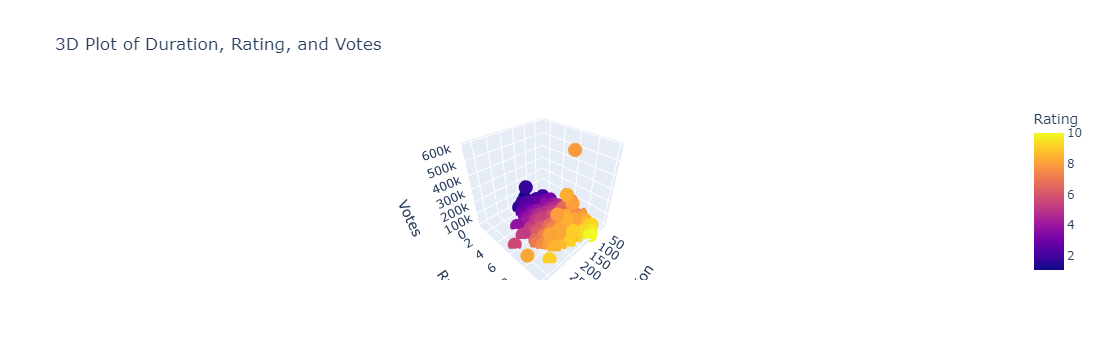

In [103]:
# Duration, Rating, and Votes Analysis
dur_rat = data[['Duration', 'Rating', 'Votes']].dropna()
dur_rat['Duration'] = dur_rat['Duration'].str.replace(' min', '').astype(int)
dur_rat['Votes'] = dur_rat['Votes'].str.replace(',', '').astype(float)
# 3D Scatter Plot of Duration, Rating, and Votes
fig = px.scatter_3d(dur_rat, x='Duration', y='Rating', z='Votes', color='Rating', title='3D Plot of Duration, Rating, and Votes')
fig.show()

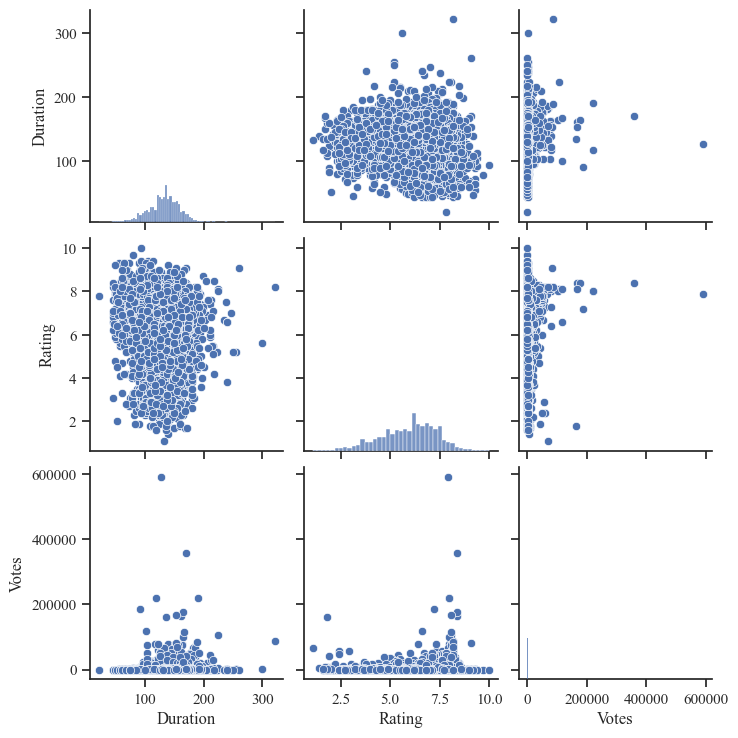

In [104]:
# Pairplot for Duration, Rating, and Votes
sns.pairplot(dur_rat)
plt.show()

## ⚙️ Data Preprocessing ⚙️

In Data Preprocessing, we will perorm:

1. Check for outliers
2. Check correlation
3. Add relevant columns
5. Apply standard scaling
6. Split data in train and test

#### Check Outliers

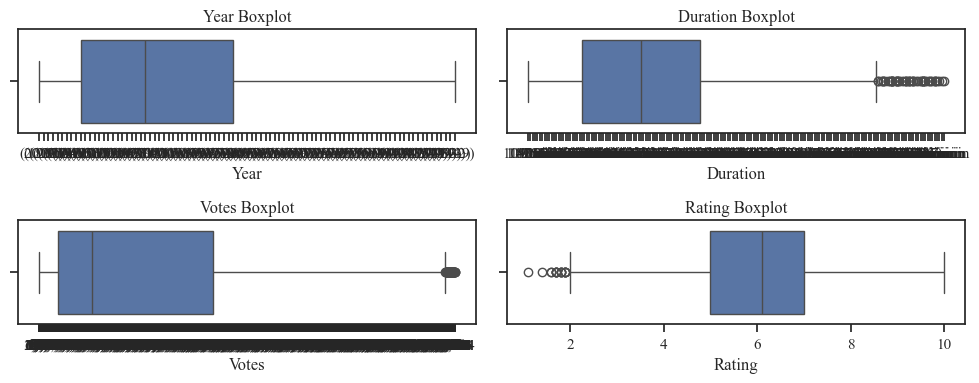

In [136]:
fig ,ax = plt.subplots(2,2,figsize=(10,4))
sns.boxplot(data, x = 'Year', ax = ax[0,0])
sns.boxplot(data, x = 'Duration', ax = ax[0,1])
sns.boxplot(data, x = 'Votes', ax = ax[1,0])
sns.boxplot(data, x = 'Rating', ax = ax[1,1])
ax[0,0].set_title('Year Boxplot')
ax[0,1].set_title('Duration Boxplot')
ax[1,0].set_title('Votes Boxplot')
ax[1,1].set_title('Rating Boxplot')
plt.tight_layout()
plt.show()

In [168]:
df_new = data.copy(deep = True)

In [169]:
def outliers_box(d_f, col_):
    try:
        q1 = np.quantile(d_f[col_], 0.25)
        q2 = np.quantile(d_f[col_], 0.75)
        iqr = q2 - q1
        maxima_ = q2 + 1.5 * iqr
        minima_ = q1 - 1.5 * iqr

        if (d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_):
            print(col_, '------- outliers present')
        else:
            print(col_, '------- outliers not present')

        return minima_, maxima_
    except Exception as e:
        print(f"Error in outliers_box for column {col_}: {e}")
        return None

In [170]:
def out_remove(d_f, col_):
    x1, y1 = outliers_box(d_f, col_)
    # Créer une copie du DataFrame
    df_copy = d_f.copy()
    # Supprimer les lignes contenant des outliers
    df_copy.drop(index=df_copy[(df_copy[col_] < x1) | (df_copy[col_] > y1)].index, axis=0, inplace=True)
    return df_copy

In [171]:
data.shape

(5851, 8)

In [172]:
for i in df_new.columns:
    # Convertir la colonne en type numérique
    df_new[i] = pd.to_numeric(df_new[i], errors='coerce')
    # Vérifier et supprimer les outliers
    df_new = out_remove(df_new, i)
    df_new.reset_index(drop=True, inplace=True)

Name ------- outliers not present
Year ------- outliers present
Duration ------- outliers present
Genre ------- outliers not present
Rating ------- outliers present
Votes ------- outliers present
Director ------- outliers not present
Actor 1 ------- outliers not present


In [174]:
df_new.shape

(4741, 8)

It is evident that there were outliers in the rating categories. Thus, we eliminated the outliers.

Total outliers in the dataset = 1110

After removing the outliers, we are left with 4741 rows

#### Check Correlation

In [176]:
df_num = data.select_dtypes(exclude = 'object')
df_num.corr()

Year  Duration    Rating     Votes
Year      1.000000 -0.337425 -0.184249  0.124877
Duration -0.337425  1.000000 -0.031093  0.099660
Rating   -0.184249 -0.031093  1.000000  0.134719
Votes     0.124877  0.099660  0.134719  1.000000

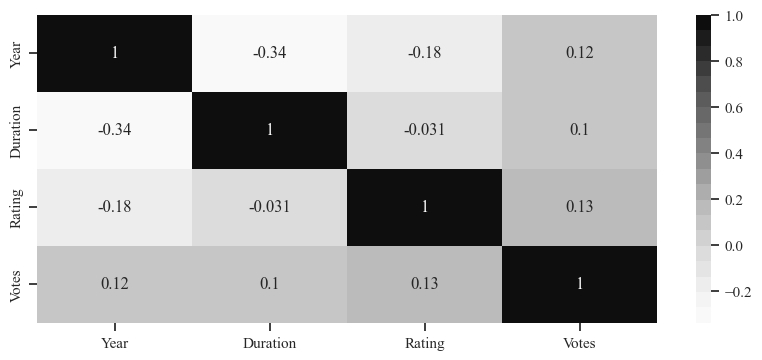

In [178]:
gray_palette = sns.color_palette('Greys', n_colors=20)
plt.figure(figsize=(10, 4))
sns.heatmap(df_num.corr(), annot=True, cmap=gray_palette)
plt.show()

#### Add Relevant Columns For Model Building

For modelling, we will add some new relevant columns:

We will apply groupby on the categorical columns and calculate their average rating.

## ✍🏻 PREPARE THE DATA FOR ALGORITHMES ✍🏻

In [187]:
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['genre_mean_rating'] = genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['actor1_encoded'] = actor1_mean_rating

In [198]:
df1 = data[[ 'Year', 'Votes', 'Duration', 'genre_mean_rating', 'director_encoded', 'actor1_encoded', 'Rating']]
df1.head()

Year Votes Duration  genre_mean_rating  director_encoded  actor1_encoded  \
1  2019     8      109           6.420575          7.000000        6.850000   
3  2019    35      110           5.716822          4.400000        5.420000   
5  1997   827      147           6.242222          5.313333        4.788889   
6  2005  1086      142           6.820000          7.383333        5.435000   
8  2012   326       82           5.477778          5.600000        5.600000   

   Rating  
1     7.0  
3     4.4  
5     4.7  
6     7.4  
8     5.6

#### Standard Scaling

In [190]:
scale = df1.drop('Rating', axis = 1)

In [197]:
ss = StandardScaler()
scaled_data = ss.fit_transform(scale)
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)
scaled_df.head(3)

Year     Votes  Duration  genre_mean_rating  director_encoded  \
0  1.134094 -0.193801 -0.877264           0.790586          0.945606   
1  1.134094 -0.191791 -0.839604          -0.347897         -1.356161   
2  0.029285 -0.132831  0.553806           0.502059         -0.547592   

   actor1_encoded  
0        0.875724  
1       -0.488235  
2       -1.090200

#### Split Data 

In [199]:
X = scaled_df
y = df1['Rating']

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

## Logistic Regression 📝

In [206]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
ypred_lr =  model_lr.predict(X_test)
ypred_lr_train = model_lr.predict(X_train)

#### RMSE

In [208]:
import math

mse_lr = mean_squared_error(y_test, ypred_lr)
mse_lr_train = mean_squared_error(y_train, ypred_lr_train)
rmse_lr = math.sqrt(mse_lr)
rmse_lr_train = math.sqrt(mse_lr_train)

print(rmse_lr)
print(rmse_lr_train)

0.7064384120061407
0.7283645210192564


## Lasso Regression 📝

In [209]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.001)
model_ls = ls.fit(X_train, y_train)
ypred_ls =  model_ls.predict(X_test)
ypred_ls_train = model_ls.predict(X_train)

#### RMSE 

In [210]:
mse_ls = mean_squared_error(y_test, ypred_ls)
mse_ls_train = mean_squared_error(y_train, ypred_ls_train)
rmse_ls = math.sqrt(mse_ls)
rmse_ls_train = math.sqrt(mse_ls_train)

print(rmse_ls)
print(rmse_ls_train)

0.7064368919296073
0.7283671634277679


## Ridge Regression 📝

In [212]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha = 3)
model_rg = rg.fit(X_train, y_train)
ypred_rg =  model_rg.predict(X_test)
ypred_rg_train = model_rg.predict(X_train)

#### RMSE

In [213]:
mse_rg = mean_squared_error(y_test, ypred_rg)
mse_rg_train = mean_squared_error(y_train, ypred_rg_train)
rmse_rg = math.sqrt(mse_rg)
rmse_rg_train = math.sqrt(mse_rg_train)

print(rmse_rg)
print(rmse_rg_train)

0.7064538021702227
0.7283647257628285


## Decision Tree 📝

In [215]:
from sklearn.model_selection import GridSearchCV as gscv
from sklearn.tree import DecisionTreeRegressor
htmodel_dt = gscv(DecisionTreeRegressor(), param_grid = {'max_depth': [2,5,10,15,20,25],
                                                       'min_samples_leaf': [1,2,3],
                                                       'min_samples_split': [2,3,4],
                                                       'max_leaf_nodes': [2,6,10,14,18,20],
                                                       'min_impurity_decrease': [0,1,2]}, cv = 5)

In [216]:
htmodel_dt.fit(X, y)
print(htmodel_dt.best_params_)

{'max_depth': 10, 'max_leaf_nodes': 20, 'min_impurity_decrease': 0, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [217]:
model_dt_gscv = DecisionTreeRegressor(max_depth = htmodel_dt.best_params_.get('max_depth'),
         min_samples_leaf = htmodel_dt.best_params_.get('min_samples_leaf'),
         min_samples_split = htmodel_dt.best_params_.get('min_samples_split'),
         max_leaf_nodes = htmodel_dt.best_params_.get('max_leaf_nodes'),
         min_impurity_decrease = htmodel_dt.best_params_.get('min_impurity_decrease')).fit(X_train, y_train)

In [218]:
ypred_dt =  model_dt_gscv.predict(X_test)
ypred_dt_train = model_dt_gscv.predict(X_train)

#### RMSE 

In [219]:
mse_dt = mean_squared_error(y_test, ypred_dt)
mse_dt_train = mean_squared_error(y_train, ypred_dt_train)
rmse_dt = math.sqrt(mse_dt)
rmse_dt_train = math.sqrt(mse_dt_train)

print(rmse_dt)
print(rmse_dt_train)

0.7528562211356813
0.738372752230217


## Random Forest 📝

In [221]:
from sklearn.ensemble import RandomForestRegressor
htmodel_rf = gscv(RandomForestRegressor(random_state = 110), param_grid = {'n_estimators': [20, 40, 60, 80, 100],
                                                       'max_features': ['auto', 'sqrt', 'log2'],
                                                       'max_depth' : [4,5,6,7,8],
                                                       "min_samples_split" : [2,4,6,8,10],
                                                       "bootstrap": [True, False]}, cv = 5)
htmodel_rf.fit(X,y)
print(htmodel_rf.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100}


In [223]:
model_rf_gscv = RandomForestRegressor(n_estimators = htmodel_rf.best_params_.get('n_estimators'),
                                       max_depth = htmodel_rf.best_params_.get('max_depth'),
                                       max_features = htmodel_rf.best_params_.get('max_features'),
                                       min_samples_split = htmodel_rf.best_params_.get('min_samples_split'),
                                       bootstrap = htmodel_rf.best_params_.get('bootstrap')).fit(X_train, y_train)
ypred_rf =  model_rf_gscv.predict(X_test)
ypred_rf_train = model_rf_gscv.predict(X_train)

#### RMSE

In [224]:
mse_rf = mean_squared_error(y_test, ypred_rf)
mse_rf_train = mean_squared_error(y_train, ypred_rf_train)
rmse_rf = math.sqrt(mse_rf)
rmse_rf_train = math.sqrt(mse_rf_train)

print(rmse_rf)
print(rmse_rf_train)

0.6637820692376046
0.5946238893024869


## XGBoost Regressor

In [225]:
import xgboost
xg = xgboost.XGBRegressor(n_estimators = 30)
model_xg = xg.fit(X_train, y_train)

In [226]:
ypred_xg =  model_xg.predict(X_test)
ypred_xg_train = model_xg.predict(X_train)

#### RMSE

In [227]:
mse_xg = mean_squared_error(y_test, ypred_xg)
mse_xg_train = mean_squared_error(y_train, ypred_xg_train)
rmse_xg = math.sqrt(mse_xg)
rmse_xg_train = math.sqrt(mse_xg_train)

print(rmse_xg)
print(rmse_xg_train)

0.6599869524583163
0.45816387095109495


### Score Card 

In [228]:
from sklearn.metrics import r2_score, mean_absolute_error, f1_score, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score

In [229]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Mean_Squared_Error_Train', 'Mean_Absolute_Error_Train', 'R2_Score_Train', 'Root_Mean_Squared_Error_Train', 'Mean_Squared_Error_Test', 'Mean_Absolute_Error_Test', 'R2_Score_Test', 'Root_Mean_Squared_Error_Test'])
df_scorecard

Empty DataFrame
Columns: [Model_name, Mean_Squared_Error_Train, Mean_Absolute_Error_Train, R2_Score_Train, Root_Mean_Squared_Error_Train, Mean_Squared_Error_Test, Mean_Absolute_Error_Test, R2_Score_Test, Root_Mean_Squared_Error_Test]
Index: []

In [237]:
def score_card(d_f, model_name, y_train, y_test, train_pred, test_pred, train_rmse, test_rmse):
    metrics_dict = {
        'Model_name': model_name,
        'Mean_Squared_Error_Train': mean_squared_error(y_train, train_pred), 
        'Mean_Absolute_Error_Train': mean_absolute_error(y_train, train_pred), 
        'R2_Score_Train': r2_score(train_pred, y_train),
        'Root_Mean_Squared_Error_Train': train_rmse,
        'Mean_Squared_Error_Test': mean_squared_error(y_test, test_pred), 
        'Mean_Absolute_Error_Test': mean_absolute_error(y_test, test_pred), 
        'R2_Score_Test': r2_score(test_pred, y_test),
        'Root_Mean_Squared_Error_Test': test_rmse
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

In [238]:
df101 = score_card(df_scorecard, 'Linear Regression', y_train, y_test, ypred_lr_train, ypred_lr, rmse_lr_train, rmse_lr)
df102 = score_card(df101, 'Lasso Regression', y_train, y_test, ypred_ls_train, ypred_ls, rmse_ls_train, rmse_ls)
df103 = score_card(df102, 'Ridge Regression', y_train, y_test, ypred_rg_train, ypred_rg, rmse_rg_train, rmse_rg)
df104 = score_card(df103, 'Decision Tree Regressor', y_train, y_test, ypred_dt_train, ypred_dt, rmse_dt_train, rmse_dt)
df105 = score_card(df104, 'Random Forest Regressor', y_train, y_test, ypred_rf_train, ypred_rf, rmse_rf_train, rmse_rf)
df106 = score_card(df105, 'XGBoost Regressor', y_train, y_test, ypred_xg_train, ypred_xg, rmse_xg_train, rmse_xg)
df106

Model_name  Mean_Squared_Error_Train  \
0        Linear Regression                  0.530515   
1         Lasso Regression                  0.530519   
2         Ridge Regression                  0.530515   
3  Decision Tree Regressor                  0.545194   
4  Random Forest Regressor                  0.353578   
5        XGBoost Regressor                  0.209914   

   Mean_Absolute_Error_Train  R2_Score_Train  Root_Mean_Squared_Error_Train  \
0                   0.532668        0.630295                       0.728365   
1                   0.532558        0.629542                       0.728367   
2                   0.532645        0.630005                       0.728365   
3                   0.535370        0.616138                       0.738373   
4                   0.426641        0.735528                       0.594624   
5                   0.322045        0.871065                       0.458164   

   Mean_Squared_Error_Test  Mean_Absolute_Error_Test  R2_Score_Test  \
0                 0.499055                  0.509950       0.634700   
1                 0.499053                  0.509840       0.633963   
2                 0.499077                  0.509935       0.634398   
3                 0.566792                  0.534171       0.590117   
4                 0.440607                  0.465180       0.644028   
5                 0.435583                  0.463368       0.712609   

   Root_Mean_Squared_Error_Test  
0                      0.706438  
1                      0.706437  
2                      0.706454  
3                      0.752856  
4                      0.663782  
5                      0.659987

![title](end1.jpg)